Задача 2.

In [182]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

In [183]:
from scipy import stats
from scipy.stats import skew as scipy_skew
from scipy.stats import gaussian_kde

# устанавливаем объем выборки
n = 25
# создаем выборку
sample = np.random.exponential(scale=1, size=n)
sample_sorted = np.sort(sample)
print("Получена следующая выборка (отсортирована по возрастанию):")
print(sample_sorted)


Получена следующая выборка (отсортирована по возрастанию):
[0.02079931 0.05983877 0.15023453 0.16959629 0.16962487 0.20067899
 0.20261142 0.23868763 0.34422299 0.34551551 0.36275373 0.45627722
 0.46926809 0.56553707 0.60893469 0.74392783 0.91294255 0.91908215
 0.94637087 1.23125006 1.31674569 1.78642954 2.01123086 3.01012143
 3.50355748]


Пункт a)

In [184]:
# вычисляем медиану
median = np.median(sample_sorted)
print(f"Медиана = {median}")

Медиана = 0.4692680899768591


In [185]:
# Вычисляем размах
min_el = np.min(sample_sorted)
max_el = np.max(sample_sorted)

width = max_el - min_el

print (f"Размах = {width}") 

Размах = 3.4827581671591736


In [199]:
# расчет коэффициента ассиметрии
skew = scipy_skew(sample_sorted)
print(f"Коэффициент ассиметри = {skew:.4f}")

Коэффициент ассиметри = 1.6998


In [187]:
print(sample_sorted)
# Строим гистограмму и разбиваем на интервалы)
bins_count = 8
counts, bin_edges = np.histogram(sample_sorted, bins=bins_count)
print(f"Количество значений в интервале по порядку: {counts}")
print(f"Вершины-границы интервалов: {bin_edges}")

# Находим интервал с максимальной частотой
mode_bin_index = np.argmax(counts)  # индекс этого интервала
max_frequency = counts[mode_bin_index]  # максимальная частота

# Определяем границы этого интервала
mode_bin_start = bin_edges[mode_bin_index]
mode_bin_end = bin_edges[mode_bin_index + 1]

# Оценка моды - середина модального интервала
mode_estimate = (mode_bin_start + mode_bin_end) / 2
print(f"\nМода = {mode_estimate}")


[0.02079931 0.05983877 0.15023453 0.16959629 0.16962487 0.20067899
 0.20261142 0.23868763 0.34422299 0.34551551 0.36275373 0.45627722
 0.46926809 0.56553707 0.60893469 0.74392783 0.91294255 0.91908215
 0.94637087 1.23125006 1.31674569 1.78642954 2.01123086 3.01012143
 3.50355748]
Количество значений в интервале по порядку: [11  5  5  0  2  0  1  1]
Вершины-границы интервалов: [0.02079931 0.45614408 0.89148885 1.32683362 1.76217839 2.19752316
 2.63286793 3.0682127  3.50355748]

Мода = 0.23847169344658697


Пункт b)

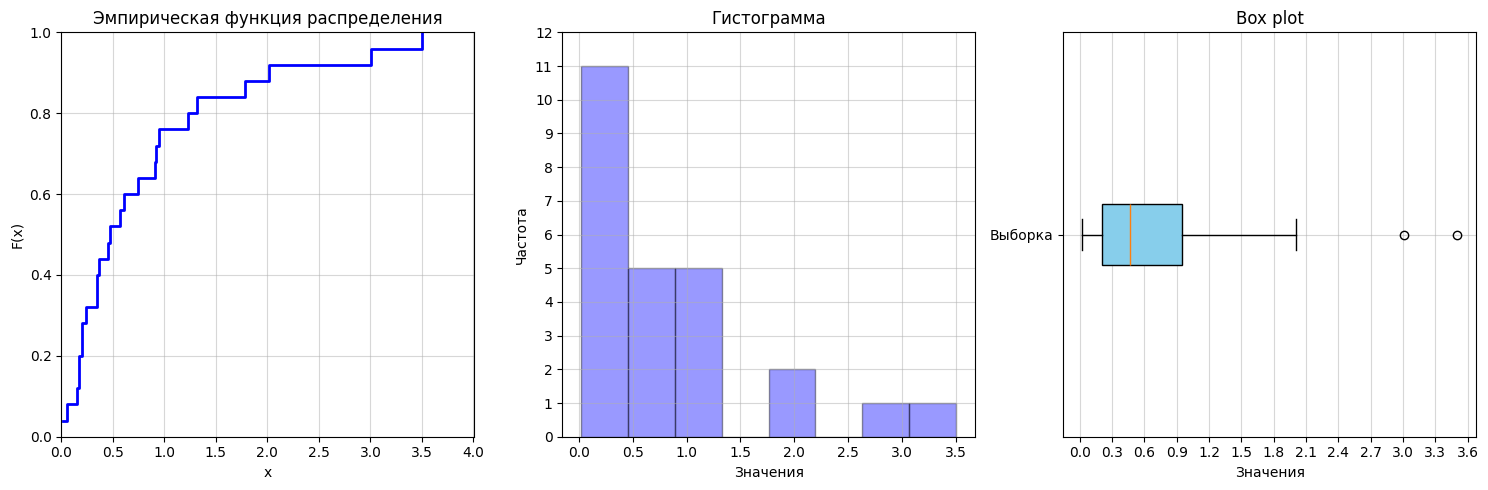

Основные статистики:
Медиана: 0.469
Квартили: Q1=0.203, Q3=0.946
Минимум: 0.021, Максимум: 3.504


In [188]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 1. Эмпирическая функция распределения
ax = axes[0]
# Значения ЭФР: от 0 до 1 с шагом 1/n
y = np.arange(1, n+1) / n

# Рисуем ступенчатую функцию
ax.step(sample_sorted, y, where='post', color='blue', linewidth=2)

ax.set_xlabel('x')
ax.set_ylabel('F(x)')
ax.set_title('Эмпирическая функция распределения')
ax.grid(True, alpha=0.5)
ax.set_xlim(0, max(sample) + 0.5)
ax.set_ylim(0, 1)

# ===== 2. Гистограмма =====
ax = axes[1]
ax.hist(sample, bins=8, alpha=0.4, color='blue', edgecolor='black')
ax.set_xlabel('Значения')
ax.set_ylabel('Частота')
ax.set_yticks(np.arange(0, max(counts) + 2, 1))
ax.set_title('Гистограмма')
ax.grid(True, alpha=0.5)

# ===== 3. Box plot =====
ax = axes[2]
box = ax.boxplot(sample, patch_artist=True, vert=False)
box['boxes'][0].set_facecolor('skyblue')
ax.set_yticklabels(['Выборка'])
ax.set_xlabel('Значения')
ax.set_xticks(np.arange(0, np.max(sample)+0.1, 0.3))
ax.set_title('Box plot')
ax.grid(True, alpha=0.5)

plt.tight_layout()
plt.show()

# Выводим основные статистики
print("Основные статистики:")
print(f"Медиана: {np.median(sample):.3f}")
print(f"Квартили: Q1={np.percentile(sample, 25):.3f}, Q3={np.percentile(sample, 75):.3f}")
print(f"Минимум: {np.min(sample):.3f}, Максимум: {np.max(sample):.3f}")

Пункт с)

In [191]:
### Оценка среднего ###
# ЦПТ
mean_sample = np.mean(sample)
std_sample = np.std(sample, ddof=1)
print(f"\nИсходная выборка:")
print(f"  Среднее = {mean_sample:.4f}")
print(f"  Стандартное отклонение = {std_sample:.4f}")

# 1. Оценка по ЦПТ
print(f"\n Оценка по ЦПТ:")
print(f"  X̄ ~ N({mean_sample:.4f}, {std_sample**2:.4f}/{n})")
print(f"  X̄ ~ N({mean_sample:.4f}, {(std_sample/np.sqrt(n))**2:.4f})")

# Создаем теоретическую плотность (нормальное распределение)
cpt_mean = mean_sample
cpt_std = std_sample / np.sqrt(n)

# 2. Бутстраповская оценка плотности
# Генерируем бутстрап-выборки и считаем их средние
n_bootstrap = 10000
bootstrap_means = []

print(f"\n Выполняем бутстрап (n_bootstrap={n_bootstrap}):")
for i in range(n_bootstrap):
    # Генерируем псевдовыборку с возвращением
    bootstrap_sample = np.random.choice(sample, size=n, replace=True)
    bootstrap_means.append(np.mean(bootstrap_sample))

bootstrap_means = np.array(bootstrap_means)
print(f"  Сгенерировано {len(bootstrap_means)} бутстрап-средних")
print(f"  Среднее бутстрап-средних = {np.mean(bootstrap_means):.4f}")
print(f"  Ст. отклонение бутстрап-средних = {np.std(bootstrap_means, ddof=1):.4f}")


Исходная выборка:
  Среднее = 0.8298
  Стандартное отклонение = 0.9001

 Оценка по ЦПТ:
  X̄ ~ N(0.8298, 0.8102/25)
  X̄ ~ N(0.8298, 0.0324)

 Выполняем бутстрап (n_bootstrap=10000):
  Сгенерировано 10000 бутстрап-средних
  Среднее бутстрап-средних = 0.8303
  Ст. отклонение бутстрап-средних = 0.1769


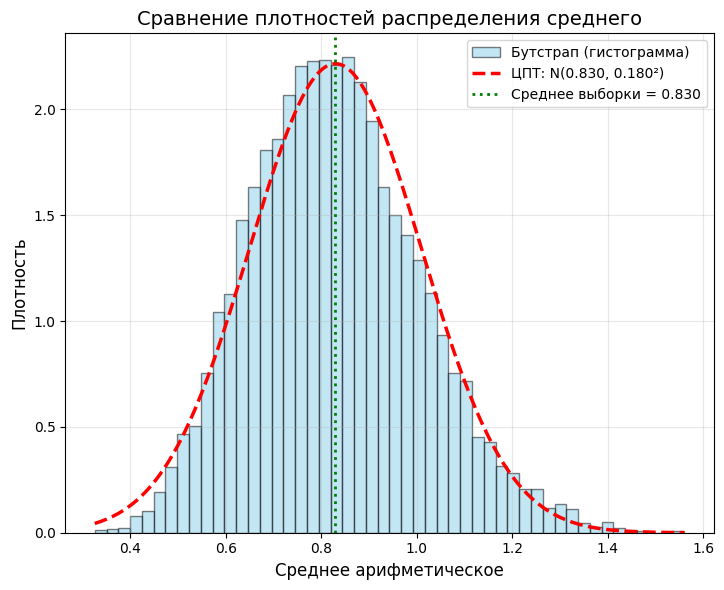

In [197]:
# Visiualisation(Гистограмма бутстрап-средних + ЦПТ)
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)

x_range = np.linspace(min(bootstrap_means), max(bootstrap_means), 200)

# Гистограмма бутстрап-средних
plt.hist(bootstrap_means, bins=50, density=True, alpha=0.5, 
         color='skyblue', edgecolor='black', label='Бутстрап (гистограмма)')

# ЦПТ-оценка плотности (нормальное распределение)
cpt_density = stats.norm.pdf(x_range, loc=cpt_mean, scale=cpt_std)
plt.plot(x_range, cpt_density, 'r--', linewidth=2.5, 
         label=f'ЦПТ: N({cpt_mean:.3f}, {cpt_std:.3f}²)')

plt.axvline(mean_sample, color='green', linestyle=':', linewidth=2, 
            label=f'Среднее выборки = {mean_sample:.3f}')

plt.title('Сравнение плотностей распределения среднего', fontsize=14)
plt.xlabel('Среднее арифметическое', fontsize=12)
plt.ylabel('Плотность', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Пункт d)

In [208]:
print(f"Ранее полученный коэффициент ассиметрии = {skew:.4f}")

# Бутстрап для коэффициента асимметрии
n_bootstrap = 10000
bootstrap_skews = []

for i in range(n_bootstrap):
    bootstrap_sample = np.random.choice(sample, size=n, replace=True)
    bootstrap_skews.append(stats.skew(bootstrap_sample, bias=False))

bootstrap_skews = np.array(bootstrap_skews)
# Вероятность P(коэффициент асимметрии < 1)
prob_less_than_1 = np.mean(bootstrap_skews < 1)
print(f"\nВероятность P(коэф асимметрии < 1) = {prob_less_than_1:.4f} ({prob_less_than_1*100:.1f}%)")

Ранее полученный коэффициент ассиметрии = 1.6998

Вероятность P(коэф асимметрии < 1) = 0.0841 (8.4%)


Пункт е)


Медиана исходной выборки: 0.4693

Теоретическая медиана Exp(1): 0.6931
Асимптотическое стандартное отклонение медианы: 0.1000


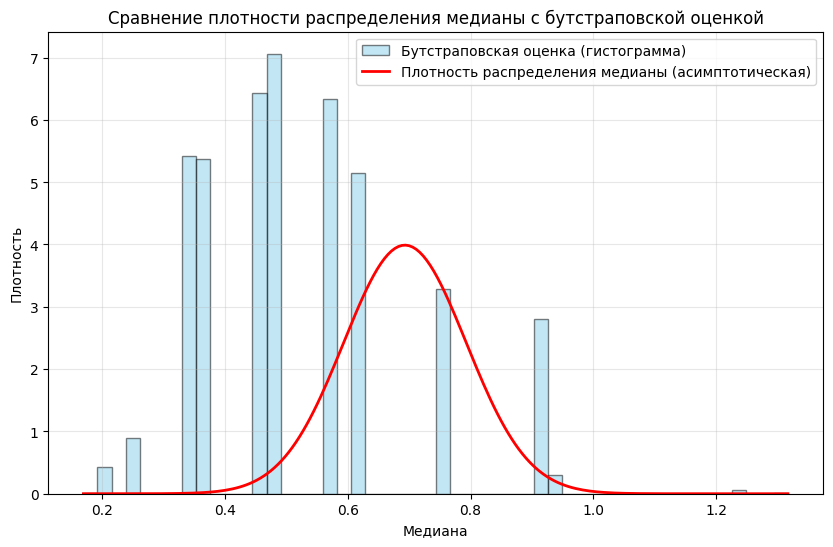


Статистика бутстрап-распределения медианы:
  Среднее = 0.5158
  Медиана = 0.4693
  Стандартное отклонение = 0.1662


In [ ]:
print(f"\nМедиана исходной выборки: {median:.4f}")

# Бутстрап для медианы
n_bootstrap = 10000
bootstrap_medians = []

for i in range(n_bootstrap):
    bootstrap_sample = np.random.choice(sample, size=n, replace=True)
    bootstrap_medians.append(np.median(bootstrap_sample))

bootstrap_medians = np.array(bootstrap_medians)

# Теоретическая плотность распределения медианы (асимптотическая нормальная)
# Для экспоненциального распределения Exp(1):
# - теоретическая медиана = ln(2) ≈ 0.6931
# - асимптотическая дисперсия медианы = 1/(4n * f²(медианы))
# - f(ln2) = exp(-ln2) = 1/2
theoretical_median = np.log(2)
asymptotic_std = 1 / (2 * np.sqrt(n))  # стандартное отклонение для Exp(1)

print(f"\nТеоретическая медиана Exp(1): {theoretical_median:.4f}")
print(f"Асимптотическое стандартное отклонение медианы: {asymptotic_std:.4f}")

# Создаем диапазон значений для отображения плотностей
x_median = np.linspace(min(bootstrap_medians), max(bootstrap_medians), 200)

# Плотность распределения медианы (асимптотическая нормальная)
median_density = stats.norm.pdf(x_median, loc=theoretical_median, scale=asymptotic_std)

# Визуализация
plt.figure(figsize=(10, 6))

# Бутстраповская оценка - гистограмма
plt.hist(bootstrap_medians, bins=50, density=True, alpha=0.5, 
         color='skyblue', edgecolor='black', label='Бутстраповская оценка')

# Теоретическая плотность
plt.plot(x_median, median_density, 'r-', linewidth=2, 
         label='Плотность распределения медианы')

plt.xlabel('Медиана')
plt.ylabel('Плотность')
plt.title('Сравнение плотности распределения медианы с бутстраповской оценкой')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()